(0.0, 2.0, 0.0, 15.0)

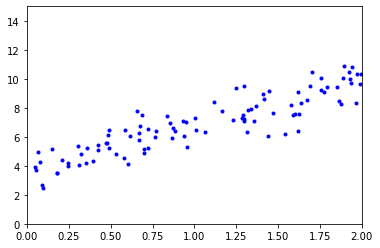

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from IPython import display

X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [2]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.74313475],
       [3.04408479]])

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[3.74313475],
       [9.83130433]])

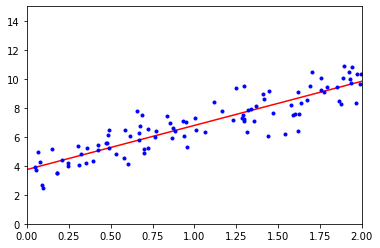

In [4]:
plt.plot(X_new,y_pred,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ # (array([4.15725481]), array([[2.97840411]]))
lin_reg.predict(X_new)

array([[3.74313475],
       [9.83130433]])

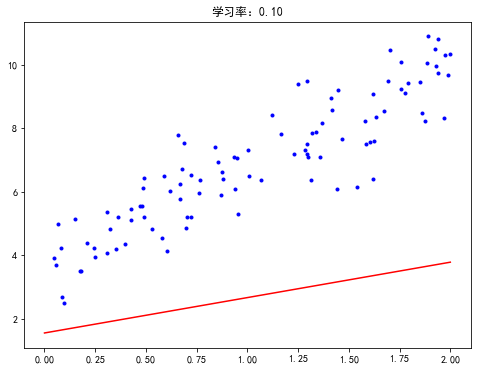

AttributeError: 'function' object has no attribute 'clear_output'

In [6]:
eta = 0.1 # 学习率
n_iter = 1000
m = 100
theta = np.random.randn(2,1)

plt.figure(figsize=(8,6))
plt.ion()# 打开交互模式
plt.axis([0,2,0,15])
plt.rcParams["font.sans-serif"] = "SimHei"

for iter in range(n_iter):
    plt.cla() # 清除原图像
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)),X_new]
    y_pred = X_new_b.dot(theta)
    plt.plot(X,y,"b.")
    plt.plot(X_new,y_pred,"r-")
    plt.title("学习率：{:.2f}".format(eta))
    plt.pause(0.1) # 暂停一会
    display.clear_output(wait=True)# 刷新图像
plt.ioff()# 关闭交互模式    
plt.show()
theta

In [20]:
from sklearn.linear_model import SGDRegressor
# help(SGDRegressor)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.70015437]), array([3.01488705]))

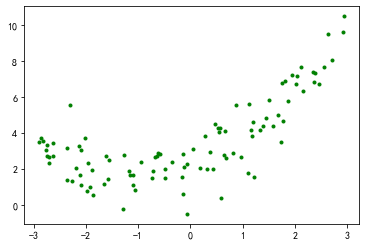

In [26]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
plt.rcParams["axes.unicode_minus"] = False
plt.plot(X, y, "g.")